**Objectives**:
1. Clean up the data
2. Predict the prices

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("kuala_lumpur.csv")

In [ ]:
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [ ]:
data.shape

(53883, 8)

In [ ]:
data.isnull().sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

In [ ]:
for col in data.columns:
  print(f'{col} is {data[col].dtype.name}')

Location is object
Price is object
Rooms is object
Bathrooms is float64
Car Parks is float64
Property Type is object
Size is object
Furnishing is object


In [ ]:
#Data cleaning:
# 1. NaNs
# 2. regex for Price, Size
# 3. Fix rooms
#Prediction magic

In [ ]:
#Car Parks clean-up
data["Car Parks"].unique()

array([ 2., nan,  4.,  3.,  1.,  5.,  6.,  7., 10.,  9.,  8., 13., 12.,
       15., 28., 11., 20., 18., 30., 24., 16., 17.])

In [ ]:
data["Car Parks"] = data["Car Parks"].fillna(0)

In [ ]:
data["Car Parks"].unique()

array([ 2.,  0.,  4.,  3.,  1.,  5.,  6.,  7., 10.,  9.,  8., 13., 12.,
       15., 28., 11., 20., 18., 30., 24., 16., 17.])

In [ ]:
# more than 4 car parking spaces - 0 
data["Car Parks"] = np.where(data["Car Parks"]>=4,4,data["Car Parks"])

In [ ]:
data["Car Parks"].unique()

array([2., 0., 4., 3., 1.])

In [ ]:
data.isnull().sum()

Location            0
Price             248
Rooms            1706
Bathrooms        2013
Car Parks           0
Property Type      25
Size             1063
Furnishing       6930
dtype: int64

In [ ]:
#Furnishing clean-up
data["Furnishing"].unique()

array(['Fully Furnished', 'Partly Furnished', nan, 'Unfurnished',
       'Unknown'], dtype=object)

In [ ]:
#nan,unknown = unfurnished
data["Furnishing"] = np.where(data["Furnishing"]=="Unknown","Unfurnished",data["Furnishing"])
data["Furnishing"] = data["Furnishing"].fillna("Unfurnished")

In [ ]:
data["Furnishing"].unique()

array(['Fully Furnished', 'Partly Furnished', 'Unfurnished'], dtype=object)

In [ ]:
data.isnull().sum()

Location            0
Price             248
Rooms            1706
Bathrooms        2013
Car Parks           0
Property Type      25
Size             1063
Furnishing          0
dtype: int64

In [ ]:
#drop remanining NaNs
data=data.dropna()

In [ ]:
data.isnull().sum()

Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
Property Type    0
Size             0
Furnishing       0
dtype: int64

In [ ]:
#split size into 2 columns = Size and Built-up
data["Size"].unique()

array(['Built-up : 1,335 sq. ft.', 'Land area : 6900 sq. ft.',
       'Built-up : 1,875 sq. ft.', ..., 'Land area : 2132 sq. ft.',
       'Land area : 1157 sq. ft.', 'Land area : 1544 sq. ft.'],
      dtype=object)

In [ ]:
data["Size"].head(10)

0        Built-up : 1,335 sq. ft.
1        Land area : 6900 sq. ft.
2        Built-up : 1,875 sq. ft.
4        Built-up : 1,513 sq. ft.
5        Land area : 7200 sq. ft.
7        Land area : 3600 sq. ft.
8       Land area : 25x75 sq. ft.
9          Built-up : 904 sq. ft.
11    Land area : 22 x 80 sq. ft.
12       Land area : 1900 sq. ft.
Name: Size, dtype: object

In [ ]:
data['Built or Land'], data['sq ft size'] = data['Size'].str.split(':', 1).str

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Built or Land,sq ft size
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,Built-up,"1,335 sq. ft."
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,0.0,Bungalow,Land area : 6900 sq. ft.,Partly Furnished,Land area,6900 sq. ft.
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,Built-up,"1,875 sq. ft."
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,Built-up,"1,513 sq. ft."
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,Land area,7200 sq. ft.


In [ ]:
data[["Location","Price","Property Type","sq ft size"]]=data[["Location","Price","Property Type","sq ft size"]].astype("str")

In [ ]:
import re
sq_ft_regex = re.compile(r' sq. ft.')
data["sq ft size"] = data["sq ft size"].str.replace(sq_ft_regex,"")

In [ ]:
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Built or Land,sq ft size
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,Built-up,"1,335"
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,0.0,Bungalow,Land area : 6900 sq. ft.,Partly Furnished,Land area,6900
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,Built-up,"1,875"
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,Built-up,"1,513"
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,Land area,7200


In [ ]:
price = re.compile(r'RM ')
data["Price"] = data["Price"].str.replace(price,"")

In [ ]:
kuala = re.compile(r', Kuala Lumpur')
data["Location"] = data["Location"].str.replace(kuala,"")

In [ ]:
data["Rooms"].unique()

array(['2+1', '6', '3', '4+1', '4+2', '5', '4', '3+1', '6+1', '5+1',
       '3+2', '1', '2', '1+1', '5+2', '2+2', '7+1', 'Studio', '7', '6+',
       '14', '12', '8', '7+', '1+2', '8+', '8+1', '13+', '20 Above', '9',
       '10', '10+1', '15+', '9+1', '10+', '11', '18', '11+1', '13+1',
       '12+', '9+', '16', '13'], dtype=object)

In [ ]:
data["Rooms"] = np.where(data["Rooms"]=="Studio",0,data["Rooms"])
data["Rooms"] = np.where(data["Rooms"]=="20 Above",20,data["Rooms"])
data["Rooms"] = data["Rooms"].apply(str)

In [ ]:
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Built or Land,sq ft size
0,KLCC,"1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,Built-up,"1,335"
1,Damansara Heights,"6,800,000",6,7.0,0.0,Bungalow,Land area : 6900 sq. ft.,Partly Furnished,Land area,6900
2,Dutamas,"1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,Built-up,"1,875"
4,Bukit Jalil,"900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,Built-up,"1,513"
5,Taman Tun Dr Ismail,"5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,Land area,7200


In [ ]:
#sump up weird "+something" rooms
room_regex = re.compile(r'\d')
nums_found = data["Rooms"].str.findall(room_regex)
data["Rooms"] = [sum([int(j) for j in k]) for k in nums_found]

In [ ]:
data.loc[data["sq ft size"].str.contains("x"),"sq ft size"]
# 1. extract nums from every something x something cell
# 2. multiply them
# 3. save them 

8           25x75
11        22 x 80
32          16x55
97          22x80
111       32 x 75
           ...   
53849       45x90
53852     22 x 75
53853     32 x 85
53867       18x65
53873       22x65
Name: sq ft size, Length: 5076, dtype: object

In [ ]:
data["sq ft size"] = data["sq ft size"].str.replace(",","")

In [ ]:
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Built or Land,sq ft size
0,KLCC,"1,250,000",3,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,Built-up,1335
1,Damansara Heights,"6,800,000",6,7.0,0.0,Bungalow,Land area : 6900 sq. ft.,Partly Furnished,Land area,6900
2,Dutamas,"1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,Built-up,1875
4,Bukit Jalil,"900,000",5,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,Built-up,1513
5,Taman Tun Dr Ismail,"5,350,000",6,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,Land area,7200


In [ ]:
plot_regex = re.compile(r'\d+')
land_plots_found = data["sq ft size"].str.findall(plot_regex)
land_plot_found_cleaned = land_plots_found.apply(lambda x:int(x[0])*int(x[1]) if len(x)==2 else (int(x[0]) if len(x)==1 else np.nan))
data["sq ft size"] = land_plot_found_cleaned
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Built or Land,sq ft size
0,KLCC,"1,250,000",3,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,Built-up,1335.0
1,Damansara Heights,"6,800,000",6,7.0,0.0,Bungalow,Land area : 6900 sq. ft.,Partly Furnished,Land area,6900.0
2,Dutamas,"1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,Built-up,1875.0
4,Bukit Jalil,"900,000",5,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,Built-up,1513.0
5,Taman Tun Dr Ismail,"5,350,000",6,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,Land area,7200.0


In [ ]:
data.isnull().sum()

Location           0
Price              0
Rooms              0
Bathrooms          0
Car Parks          0
Property Type      0
Size               0
Furnishing         0
Built or Land      0
sq ft size       134
dtype: int64

In [ ]:
# a little clean-up
data = data.dropna(subset=["sq ft size"])
data = data.drop(["Size"],axis=1)
data.isnull().sum()

Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
Property Type    0
Furnishing       0
Built or Land    0
sq ft size       0
dtype: int64

In [ ]:
data.rename(columns={"sq ft size": "Size"},inplace=True)
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,Built or Land,Size
0,KLCC,"1,250,000",3,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,1335.0
1,Damansara Heights,"6,800,000",6,7.0,0.0,Bungalow,Partly Furnished,Land area,6900.0
2,Dutamas,"1,030,000",3,4.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1875.0
4,Bukit Jalil,"900,000",5,3.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1513.0
5,Taman Tun Dr Ismail,"5,350,000",6,5.0,4.0,Bungalow,Partly Furnished,Land area,7200.0


In [ ]:
#Cleaning up property type
# Extract stuff in parentheses
type2_regex = re.compile(r'\((\w+)\)')
house_info_type2 = data["Property Type"].str.findall(type2_regex)
data["Extra info"] = house_info_type2
data["Property Type"] = data["Property Type"].str.replace(type2_regex,"")
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,Built or Land,Size,Extra info
0,KLCC,"1,250,000",3,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,1335.0,[]
1,Damansara Heights,"6,800,000",6,7.0,0.0,Bungalow,Partly Furnished,Land area,6900.0,[]
2,Dutamas,"1,030,000",3,4.0,2.0,Condominium,Partly Furnished,Built-up,1875.0,[Corner]
4,Bukit Jalil,"900,000",5,3.0,2.0,Condominium,Partly Furnished,Built-up,1513.0,[Corner]
5,Taman Tun Dr Ismail,"5,350,000",6,5.0,4.0,Bungalow,Partly Furnished,Land area,7200.0,[]


In [ ]:
#Clean empty spaces at the end of the propety types: '4.5-sty Terrace/Link House '
data["Property Type"] = data["Property Type"].str.rstrip()
#Convert House info type 2 into str
data["Extra info"] = data["Extra info"].apply(lambda x:' '.join(x))
#Reorder columns for convenience
data = data[["Price","Size","Location","Property Type","Extra info","Built or Land","Rooms","Car Parks","Bathrooms","Furnishing"]]
data.head()

,Price,Size,Location,Property Type,Extra info,Built or Land,Rooms,Car Parks,Bathrooms,Furnishing
0,"1,250,000",1335.0,KLCC,Serviced Residence,,Built-up,3,2.0,3.0,Fully Furnished
1,"6,800,000",6900.0,Damansara Heights,Bungalow,,Land area,6,0.0,7.0,Partly Furnished
2,"1,030,000",1875.0,Dutamas,Condominium,Corner,Built-up,3,2.0,4.0,Partly Furnished
4,"900,000",1513.0,Bukit Jalil,Condominium,Corner,Built-up,5,2.0,3.0,Partly Furnished
5,"5,350,000",7200.0,Taman Tun Dr Ismail,Bungalow,,Land area,6,4.0,5.0,Partly Furnished


In [ ]:
data["Extra info"] = np.where(data["Extra info"]=="","Unknown",data["Extra info"])
data["Extra info"].value_counts()

Unknown         22872
Intermediate    15460
Corner          10055
EndLot           1173
Duplex            367
Penthouse         362
Studio             96
SOHO               71
Triplex            33
Name: Extra info, dtype: int64

In [ ]:
data.head()

,Price,Size,Location,Property Type,Extra info,Built or Land,Rooms,Car Parks,Bathrooms,Furnishing
0,"1,250,000",1335.0,KLCC,Serviced Residence,Unknown,Built-up,3,2.0,3.0,Fully Furnished
1,"6,800,000",6900.0,Damansara Heights,Bungalow,Unknown,Land area,6,0.0,7.0,Partly Furnished
2,"1,030,000",1875.0,Dutamas,Condominium,Corner,Built-up,3,2.0,4.0,Partly Furnished
4,"900,000",1513.0,Bukit Jalil,Condominium,Corner,Built-up,5,2.0,3.0,Partly Furnished
5,"5,350,000",7200.0,Taman Tun Dr Ismail,Bungalow,Unknown,Land area,6,4.0,5.0,Partly Furnished


In [ ]:
data["Price"] = data["Price"].str.replace(",","")
data["Price"] = data["Price"].astype(int)

In [ ]:
data["Price"].describe()

count    5.048900e+04
mean     1.831126e+06
std      1.262203e+07
min      3.080000e+02
25%      5.800000e+05
50%      9.800000e+05
75%      1.900000e+06
max      1.980000e+09
Name: Price, dtype: float64

In [ ]:
#clip prices a bit
data_clean = data[data["Price"] < 22_000_000]

In [ ]:
data_clean.dtypes #OK

Price              int64
Size             float64
Location          object
Property Type     object
Extra info        object
Built or Land     object
Rooms              int64
Car Parks        float64
Bathrooms        float64
Furnishing        object
dtype: object

In [ ]:
#Create dummy data without "Propety type" and "Extra info" just to see how it performs

categorical_columns = ["Location","Built or Land","Furnishing"]
dummy_cats = pd.get_dummies(data_clean[categorical_columns])

drop_data = data_clean.drop(columns=categorical_columns+["Property Type","Extra info"])
onehot_data = drop_data.join(dummy_cats)

In [ ]:
onehot_data.columns

Index(['Price', 'Size', 'Rooms', 'Car Parks', 'Bathrooms',
       'Location_ADIVA Desa ParkCity', 'Location_Alam Damai',
       'Location_Ampang', 'Location_Ampang Hilir',
       'Location_Bandar Damai Perdana',
       ...
       'Location_cyberjaya', 'Location_duta Nusantara', 'Location_kepong',
       'Location_taman cheras perdana', 'Location_taman connaught',
       'Built or Land_Built-up ', 'Built or Land_Land area ',
       'Furnishing_Fully Furnished', 'Furnishing_Partly Furnished',
       'Furnishing_Unfurnished'],
      dtype='object', length=114)

In [ ]:
len(onehot_data.columns)

114

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

train,test = train_test_split(onehot_data,test_size = 0.2)
#train
X_train = train.drop(columns="Price")
Y_train = train["Price"]

#test
X_test = test.drop(columns="Price")
Y_test = test["Price"]

In [ ]:
regtree = DecisionTreeRegressor(min_samples_split=30,min_samples_leaf=10,random_state=0)

In [ ]:
regtree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
predictions = regtree.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,predictions)

0.847439762551905

In [ ]:
from sklearn.model_selection import cross_val_score
regtree_scores = cross_val_score(regtree,X_train,Y_train,cv=10)
print(f"mean cross validation score: {np.mean(regtree_scores)}")

mean cross validation score: 0.8415595543800201


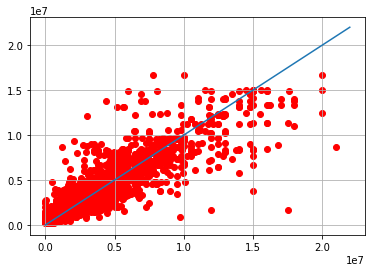

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=Y_test,y=predictions,color="r")
plt.plot([0,22_000_000],[0,22_000_000])
plt.grid()